# Simulate Learned Fish models

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = [12, 10]

import math
import numpy as np
import pickle
from multiprocessing import Pool
import time
from functools import partial

from interaction import Interaction
from environment import Environment
from DelightFish import Fish
from replica_fish import ReplicaFish
from channel import Channel
from observer import Observer
from discriminator import Classifier
from fitness import Fitness
from optimizer import Optimizer

from turing_learning import test_simulation, run_full_test
from utils import generate_distortion, generate_fish, generate_replica_fish, generate_all_fish, run_simulation

In [2]:
conn_threshold = 100
run_time = 15
total_fish = 25
k_ar = 0.003
max_speed = 9
arena_size = 300

In [3]:
# Load learned weights of interest
with open('aggregation/test1-700gen-end-scores.pkl', 'rb') as f:
    class_scores, model_scores = pickle.load(f)
    
with open('aggregation/test1-700gen-end.pkl', 'rb') as f:
    opt = pickle.load(f)

In [4]:
# select fish with best fitness
best_index = np.argmax(model_scores)
weights = opt.get_model_weights()[best_index]

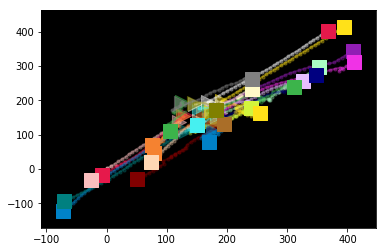

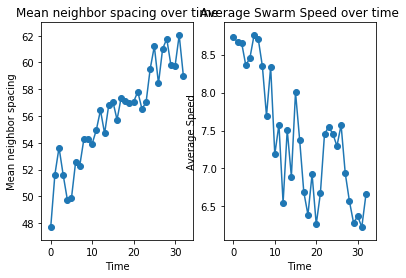

In [5]:
arena_center = arena_size / 2.0
initial_spread = 100
fish_pos = initial_spread * np.random.rand(25, 2) + arena_center - initial_spread / 2.0
clock_freqs = 1
verbose = False

distortion = generate_distortion(type='none', n=arena_size)
environment = Environment(
    node_pos=fish_pos,
    distortion=distortion,
    prob_type='binary',
    noise_magnitude=0,
    conn_thres=conn_threshold,
    verbose=verbose
)
interaction = Interaction(environment, verbose=verbose)
channel = Channel(environment)

# Have all real or all fake

n_fish = 0
n_replica_fish = 25

fish = generate_all_fish(
    n_fish=n_fish,
    n_replica_fish=n_replica_fish,
    channel=channel,
    interaction=interaction,
    k_coh = 0,
    k_ar = k_ar,
    alpha = 40,
    weights = weights,
    lim_neighbors=[0, math.inf],
    neighbor_weights=1.0,
    fish_max_speeds=max_speed,
    clock_freqs=clock_freqs,
    verbose=verbose
)
channel.set_nodes(fish)

observer = Observer(fish=fish, environment=environment, channel=channel)
run_simulation(fish=fish, 
               observer=observer, 
               run_time=35, 
               dark=True, 
               white_axis=False, 
               no_legend=True, 
               no_star=False, 
               show_dist_plot=True, 
               plot=True)